# Global Terrorism-Exploratory Data Analysis

## Data Preprocessing

In [1]:
#Choosing useful columns for analysis
usecols = [0,1,2, 5, 8,9, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 71, 73, 82,84,98, 101]
renamecols = {
    'eventid': u'event',
    'latitude': 'lat',
    'longitude': 'lon',
    'iyear': u'year',
    'country_txt': u'countryname',
    'region_txt': u'regionname',
    'provstate': u'state',
    'attacktype1_txt': u'attacktype',
    'targtype1_txt': u'targettype',
    'weaptype1_txt': u'weapontype',
    'nperps': u'nter',
    'nkill': u'nkilled',
    'nkillter': u'nkilledter',
    'nwound': u'nwounded',
    'nwoundte': u'nwoundedter',
    'propextent_txt': u'propertyextent',
    'gname': u'groupname'
    }


In [2]:
#Reading data from csv file and creating data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/Umadevi_1/Documents/uma/Thinkful/Job search/spark internship/gtdb.csv',encoding='ISO-8859-1',usecols=usecols)
df.rename(columns=renamecols,inplace=True)
df.columns

Index(['event', 'year', 'imonth', 'extended', 'countryname', 'region',
       'regionname', 'state', 'city', 'lat', 'lon', 'multiple', 'success',
       'suicide', 'attacktype', 'targettype', 'groupname', 'claimed',
       'claimmode_txt', 'weapontype', 'weapsubtype1_txt', 'nkilled',
       'nwounded'],
      dtype='object')

## Checking Data distributions-Initial Exploration

In [3]:
df.shape

(181691, 23)

In [4]:
df.isnull().sum()

event                    0
year                     0
imonth                   0
extended                 0
countryname              0
region                   0
regionname               0
state                  421
city                   434
lat                   4556
lon                   4557
multiple                 1
success                  0
suicide                  0
attacktype               0
targettype               0
groupname                0
claimed              66120
claimmode_txt       162608
weapontype               0
weapsubtype1_txt     20768
nkilled              10313
nwounded             16311
dtype: int64

In [5]:
df.describe()

,event,year,imonth,extended,region,lat,lon,multiple,success,suicide,claimed,nkilled,nwounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181690.000000,181691.000000,181691.000000,115571.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,0.045346,7.160938,23.498343,-4.586957e+02,0.137773,0.889598,0.036507,0.049666,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,0.208063,2.933408,18.569242,2.047790e+05,0.344663,0.313391,0.187549,1.093195,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,0.000000,5.000000,11.510046,4.545640e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,0.000000,6.000000,31.467463,4.324651e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,0.000000,10.000000,34.685087,6.871033e+01,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,1.000000,12.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000


In [6]:
df.corr()

,event,year,imonth,extended,region,lat,lon,multiple,success,suicide,claimed,nkilled,nwounded
event,1.000000,0.999996,0.002706,0.091761,0.401371,0.166886,0.003907,0.093720,-0.082972,0.137743,0.141600,0.015351,0.015282
year,0.999996,1.000000,0.000139,0.091754,0.401384,0.166933,0.003917,0.093736,-0.082963,0.137736,0.141486,0.015341,0.015273
imonth,0.002706,0.000139,1.000000,-0.000468,-0.002999,-0.015978,-0.003880,-0.004422,-0.002845,0.003071,0.023083,0.003463,0.002938
extended,0.091761,0.091754,-0.000468,1.000000,0.038389,-0.024749,0.000523,-0.013440,0.073233,-0.033961,0.006779,0.027737,-0.006627
region,0.401371,0.401384,-0.002999,0.038389,1.000000,0.309274,0.004351,0.011963,-0.030909,0.112672,0.003608,0.042062,0.020472
lat,0.166886,0.166933,-0.015978,-0.024749,0.309274,1.000000,0.001463,-0.024443,-0.073715,0.068682,0.023153,-0.018124,0.015988
lon,0.003907,0.003917,-0.003880,0.000523,0.004351,0.001463,1.000000,0.000950,-0.000858,0.000486,0.001634,-0.000562,0.000223
multiple,0.093720,0.093736,-0.004422,-0.013440,0.011963,-0.024443,0.000950,1.000000,0.020310,0.030750,0.051698,-0.001084,0.011341
success,-0.082972,-0.082963,-0.002845,0.073233,-0.030909,-0.073715,-0.000858,0.020310,1.000000,-0.031155,-0.005985,0.053115,0.025804
suicide,0.137743,0.137736,0.003071,-0.033961,0.112672,0.068682,0.000486,0.030750,-0.031155,1.000000,0.035791,0.136086,0.099525


### Creating a correlation marix to identify column dependancies

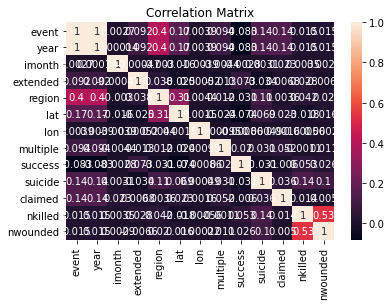

In [7]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

##### the matrix doesn't reveal much except strong dependacy between nkill and year,regions

# data analysis

/Users/Umadevi_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


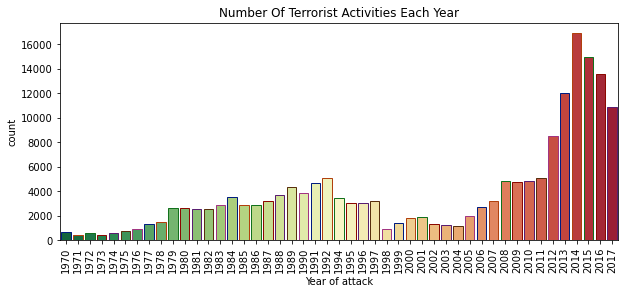

In [8]:
plt.subplots(figsize=(10,4))
sns.countplot('year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

#### shows data from 1970 to 2016 for the total number of attacks happened each year. 
Terrorist attacks were quite low in numbers in the decade of 1970. Terrorism then had a fairly rise
in the 1980s and early 1990s and was considerably low in the next decade but then terrorism
rose from early the 2000s topping the charts like never before in the history

/Users/Umadevi_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


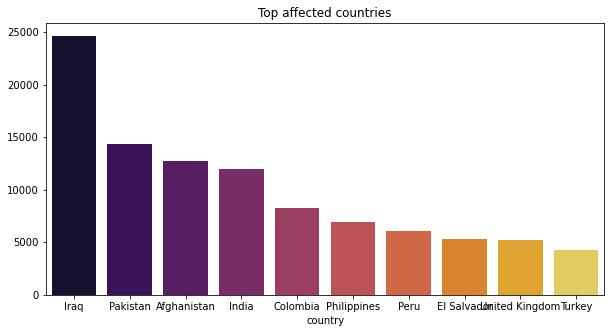

In [9]:
plt.subplots(figsize=(10,5))
sns.barplot(df['countryname'].value_counts()[:10].index,df['countryname'].value_counts()[:10].values,palette='inferno')
plt.xlabel('country')
plt.title('Top affected countries')
plt.show()

/Users/Umadevi_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


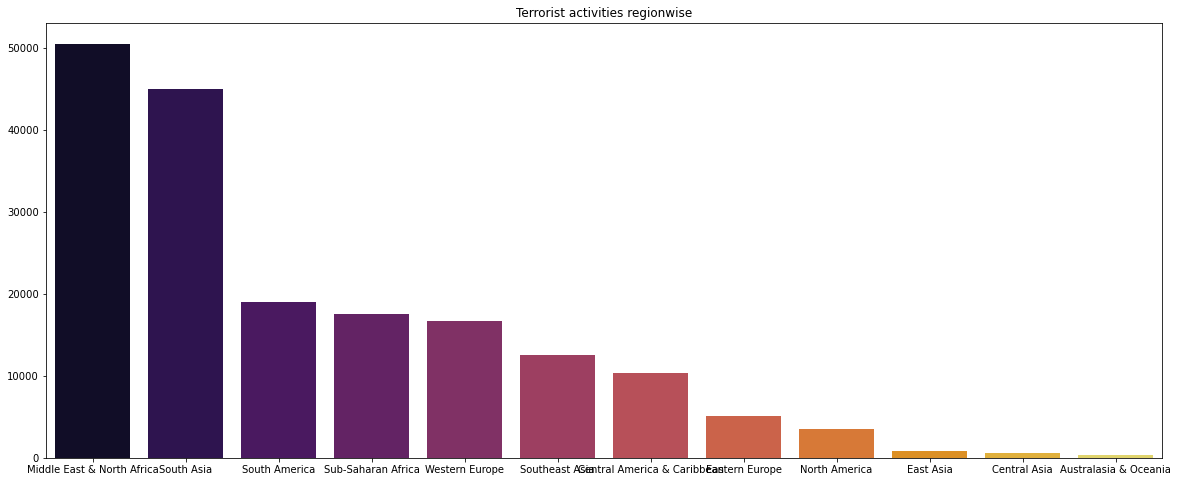

In [10]:
plt.subplots(figsize=(20,8))
sns.barplot(df['regionname'].value_counts().index,df['regionname'].value_counts().values,palette='inferno')
fig=plt.gcf()
#fig.set_size_inches(10,)
#plt.xlabel('country')
plt.title('Terrorist activities regionwise')
plt.show()

/Users/Umadevi_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


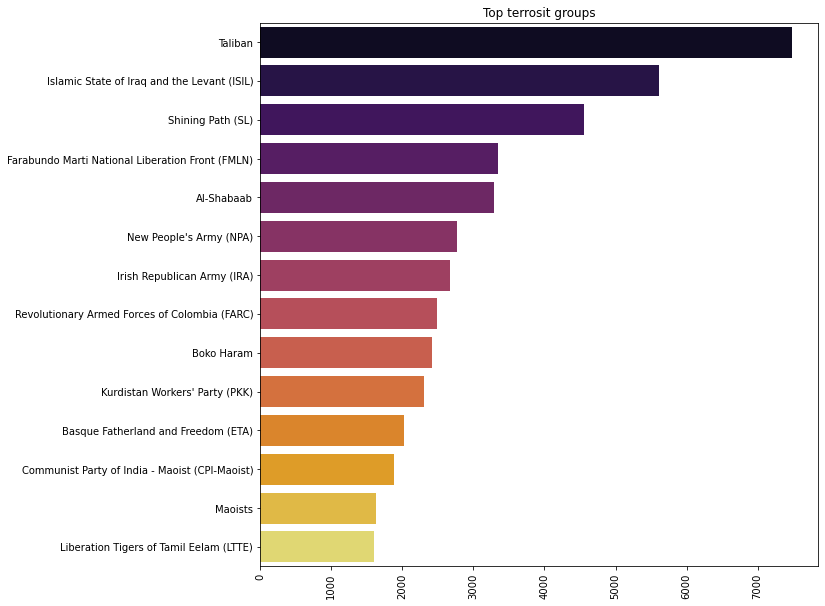

In [11]:
sns.barplot(df['groupname'].value_counts()[1:15].values,df['groupname'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Top terrosit groups')
plt.show()

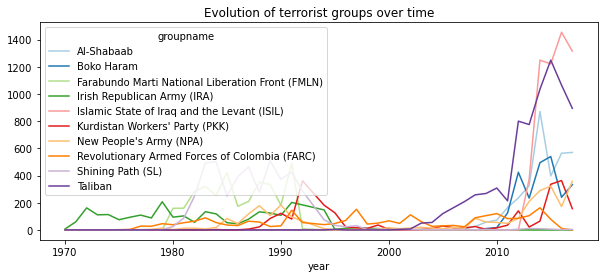

In [12]:
active10=df[df['groupname'].isin(df['groupname'].value_counts()[1:11].index)]
pd.crosstab(active10.year,active10.groupname).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.title('Evolution of terrorist groups over time')
plt.show()


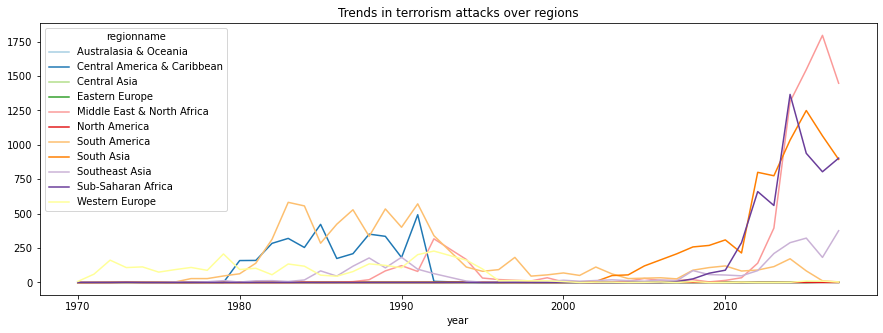

In [13]:
#Terrorism over regions over time
terr_region_time=pd.crosstab(active10.year,active10.regionname)
terr_region_time.plot(color=sns.color_palette('Paired',12))
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.title('Trends in terrorism attacks over regions')
plt.show()

#### there has been a rise and fall in almost all regions.
So even though terrorism has prevailed throughout history, there is no region that shows
consistent involvement of terrorism over time.
for example,even though South Americaregion shows an overall high rate of total attacks compared to other regions overall, this region does not add much to the current global terrorism situation
whereas,in middle east ,north africa and south asia terriosm increased steady and steep in recent years


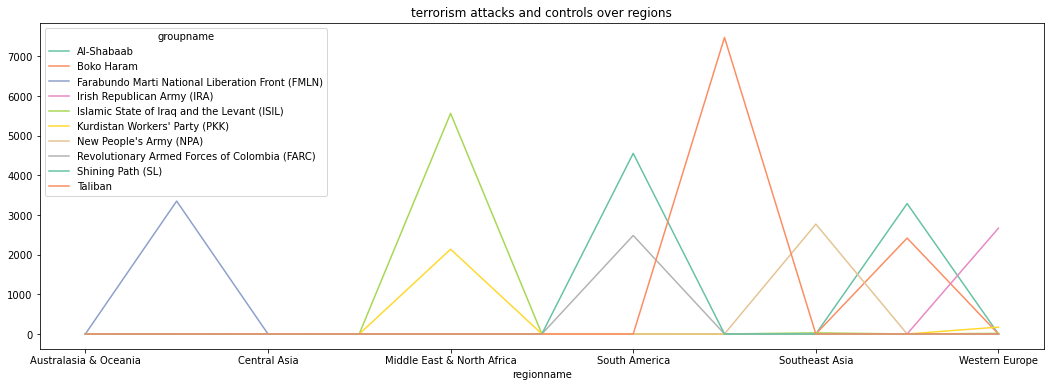

In [14]:
terr_region_time=pd.crosstab(active10.regionname,active10.groupname)
terr_region_time.plot(color=sns.color_palette('Set2',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('terrorism attacks and controls over regions')
plt.show()

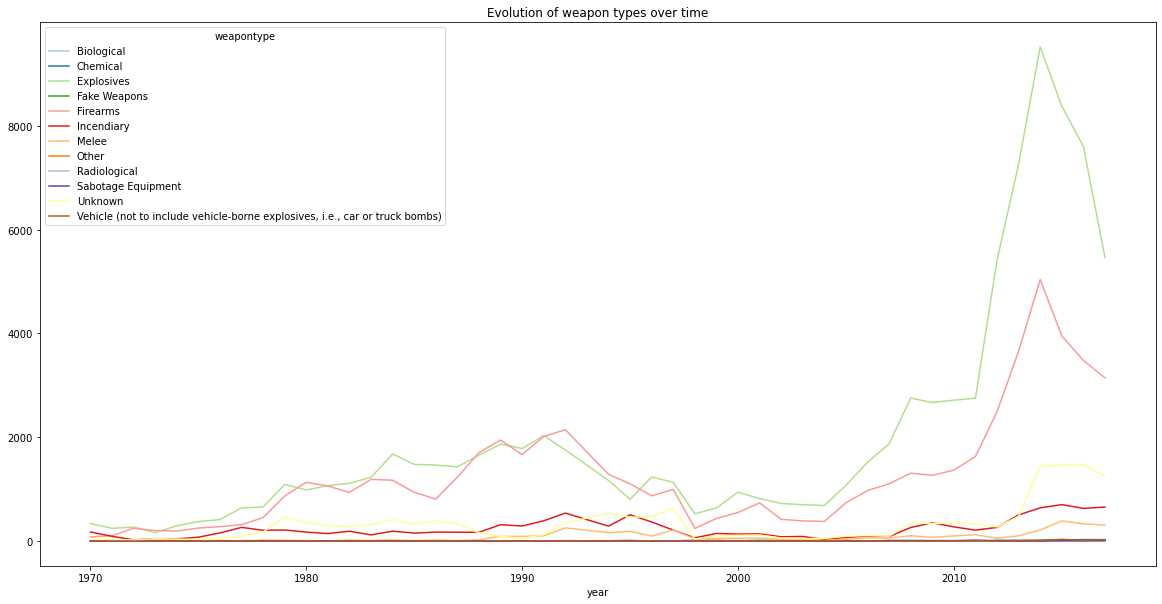

In [15]:
terr_region_time=pd.crosstab(df.year,df.weapontype)
terr_region_time.plot(color=sns.color_palette('Paired',13))
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Evolution of weapon types over time')
plt.show()

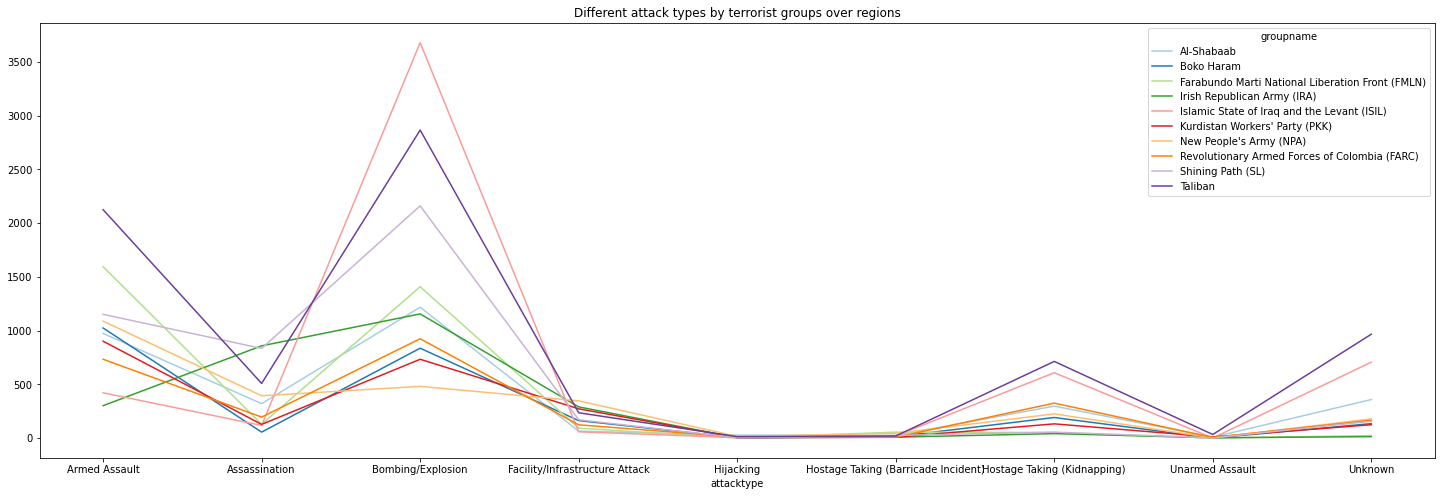

In [16]:
terr_region_time=pd.crosstab(df.attacktype,active10.groupname)
terr_region_time.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(25,8)
plt.title('Different attack types by terrorist groups over regions')
plt.show()

In [17]:
df['targettype'].value_counts()[:10].index

Index(['Private Citizens & Property', 'Military', 'Police',
       'Government (General)', 'Business', 'Transportation', 'Utilities',
       'Unknown', 'Religious Figures/Institutions', 'Educational Institution'],
      dtype='object')

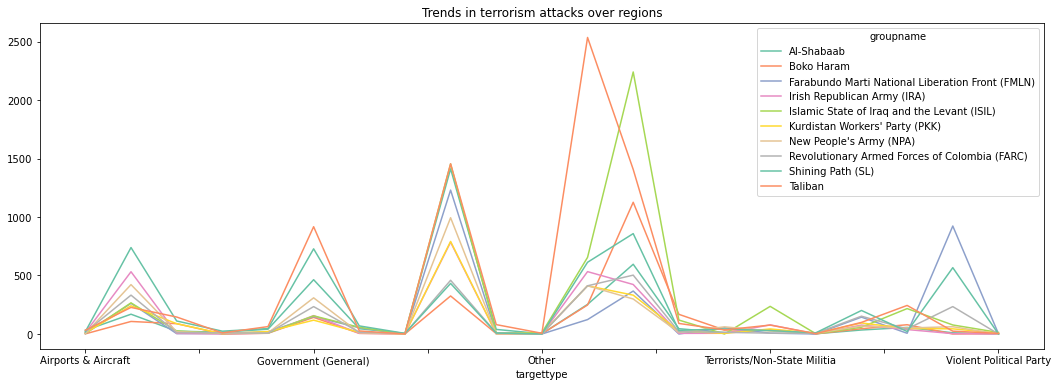

In [18]:

terr_region_time=pd.crosstab(active10.targettype,active10.groupname)
terr_region_time.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Trends in terrorism attacks over regions')
plt.show()

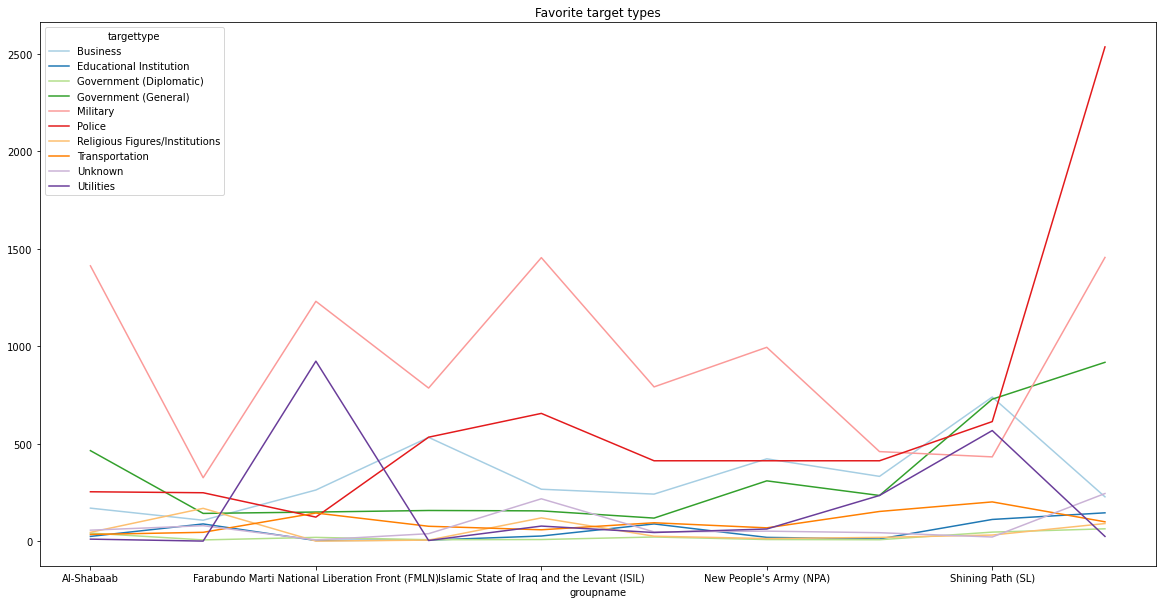

In [30]:
target10=df[df['targettype'].isin(df['targettype'].value_counts()[1:11].index)]
pd.crosstab(active10.groupname,target10.targettype).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Favorite target types')
plt.show()

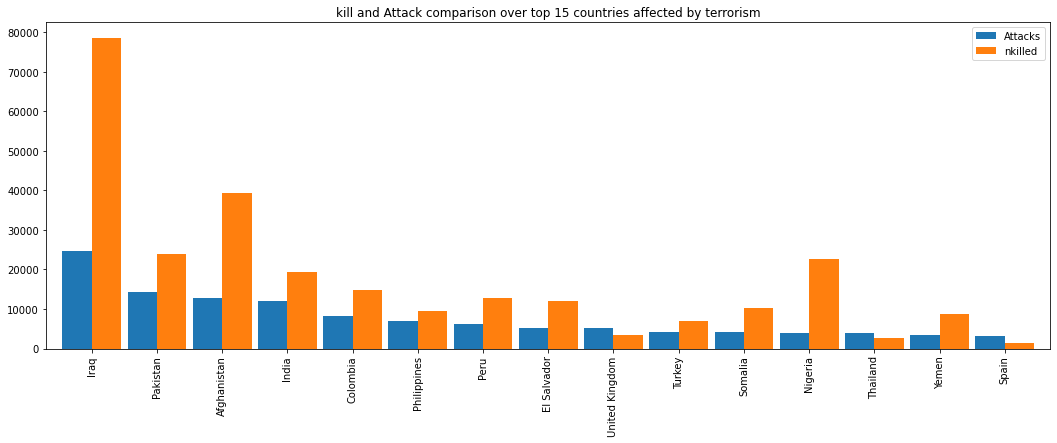

In [20]:
count=df['countryname'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('countryname')['nkilled'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('kill and Attack comparison over top 15 countries affected by terrorism')
plt.show()

In [21]:
df.shape

(181691, 23)

## cleaning for empty values in 'nkilled' 

In [22]:
df1=df.dropna(axis=0,subset=['nkilled'])
df1.shape

(171378, 23)

## getting country,totalattack,totalkill for top 15 countries affected by terrorism
## checking for terrorism resistance among countries

In [23]:
countries=df['countryname'].value_counts()[:15].index
countries


Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey', 'Somalia', 'Nigeria',
       'Thailand', 'Yemen', 'Spain'],
      dtype='object')

In [24]:
attacks=df['countryname'].value_counts()[:15].values

In [25]:
attacks

array([24636, 14368, 12731, 11960,  8306,  6908,  6096,  5320,  5235,
        4292,  4142,  3907,  3849,  3347,  3249])

In [26]:
totalkill=df1.groupby('countryname')['nkilled'].sum().reset_index()
totalkill

,countryname,nkilled
0,Afghanistan,39384.0
1,Albania,42.0
2,Algeria,11066.0
3,Angola,3043.0
4,Argentina,490.0
...,...,...
197,Yemen,8776.0
198,Yugoslavia,119.0
199,Zaire,324.0
200,Zambia,70.0


In [27]:
y=[]
for i in range(0,15):
   x=totalkill[(totalkill['countryname']==countries[i]).values]
   x=x['nkilled'].values
   y.append(x)

y

[array([78589.]),
 array([23822.]),
 array([39384.]),
 array([19341.]),
 array([14698.]),
 array([9559.]),
 array([12771.]),
 array([12053.]),
 array([3410.]),
 array([6888.]),
 array([10273.]),
 array([22682.]),
 array([2742.]),
 array([8776.]),
 array([1288.])]

In [28]:
temp=[]
for i in range(0,15):
    x=y[i]/attacks[i]
    temp.append(x)
df3 = pd.DataFrame(list(zip(countries, temp)),
               columns =['country', 'kill to attack ratio'])
df3

 

,country,kill to attack ratio
0,Iraq,[3.1900064945608055]
1,Pakistan,[1.6579899777282852]
2,Afghanistan,[3.0935511742989554]
3,India,[1.6171404682274249]
4,Colombia,[1.7695641704791716]
5,Philippines,[1.3837579617834395]
6,Peru,[2.09498031496063]
7,El Salvador,[2.2656015037593984]
8,United Kingdom,[0.6513849092645654]
9,Turkey,[1.6048462255358806]


In [29]:
df3.sort_values(by='kill to attack ratio', ascending=False)

,country,kill to attack ratio
11,Nigeria,[5.805477348349117]
0,Iraq,[3.1900064945608055]
2,Afghanistan,[3.0935511742989554]
13,Yemen,[2.62204959665372]
10,Somalia,[2.48020280057943]
7,El Salvador,[2.2656015037593984]
6,Peru,[2.09498031496063]
4,Colombia,[1.7695641704791716]
1,Pakistan,[1.6579899777282852]
3,India,[1.6171404682274249]


#### countries  Thailand,Uk and Spain haver greater resistance over terrorism